# Пункт 1
## Загружаем таблицу данных

In [1]:
import pandas as pd

url = 'train.csv'
train = pd.read_csv(url)
url = 'test.csv'
X_test = pd.read_csv(url)
url = 'sample_submission.csv'
y_test = pd.read_csv(url)
train.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


## Статистика по переменным
### Тренировочная выборка

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


Нет пропущенных значений.

In [3]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


Судя по таблице, аномальные значения присутствуют. В дальнейшем удалим их из тренировочной и тестовой выборок, а также удалим повторяющиеся данные, если они имеются.
#### Распределения

In [4]:
train.rename(columns={'TARGET(PRICE_IN_LACS)':'PRICE'}, inplace=True)
columns = train.columns
for col in columns:
    print(train[col].value_counts())
    print("the total values is :", train[col].value_counts().sum())
    print('*' * 50)

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
the total values is : 29451
**************************************************
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64
the total values is : 29451
**************************************************
0    20088
1     9363
Name: RERA, dtype: int64
the total values is : 29451
**************************************************
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: BHK_NO., dtype: int64
the total values is : 29451
**************************************************
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
the total values is : 29451
**************************************************
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.17

#### Визуализация качественных распределений

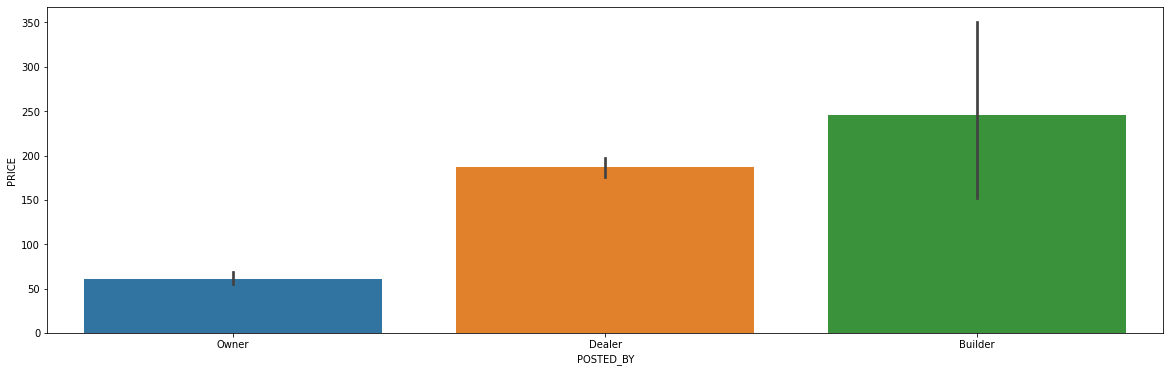

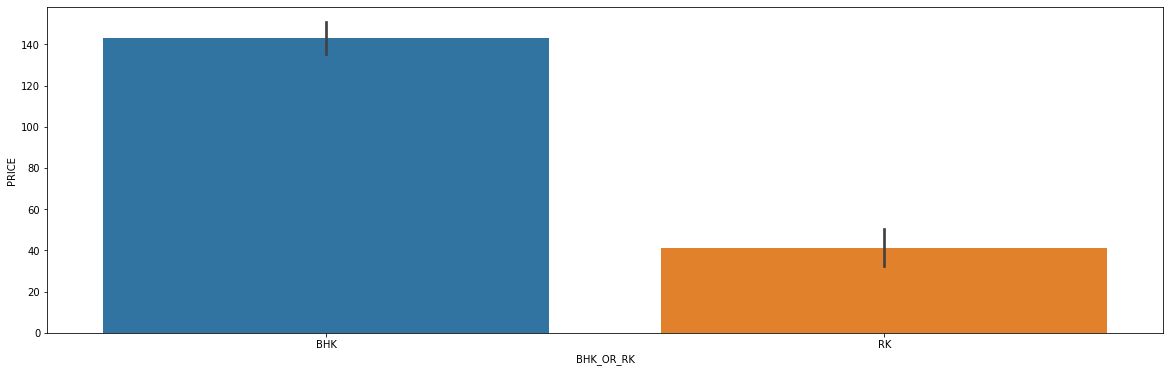

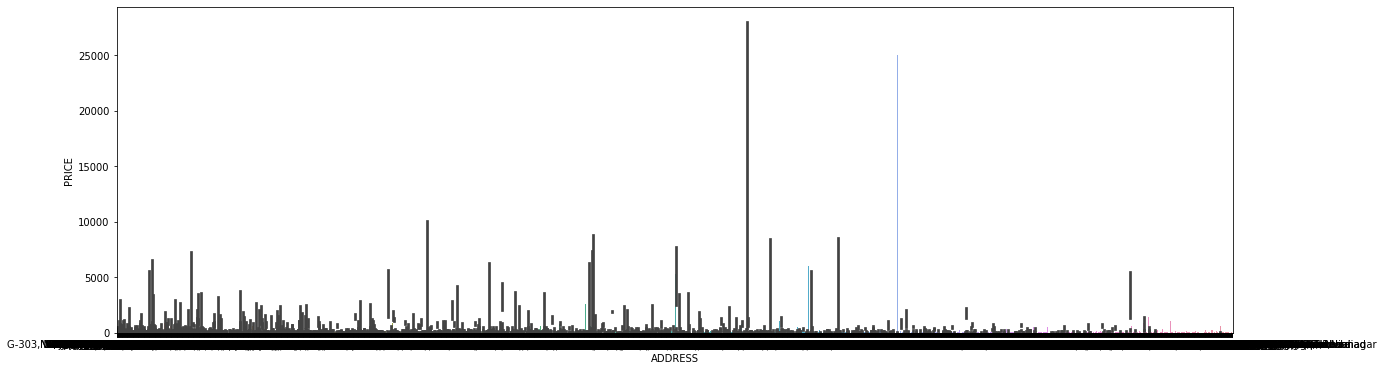

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

c_col = train.select_dtypes (object)
n_col = train.select_dtypes(['int', 'float'])

for col in c_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=train[col], y=train['PRICE'])

#### Визуализация количественных распределений

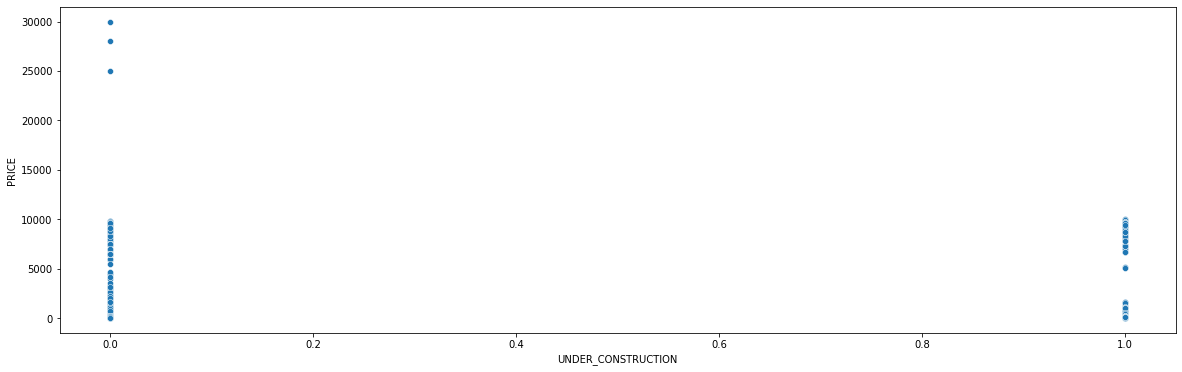

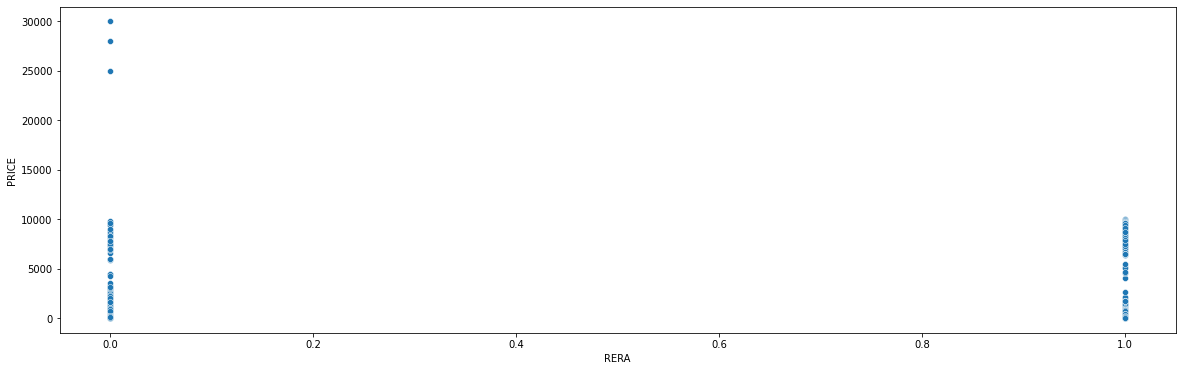

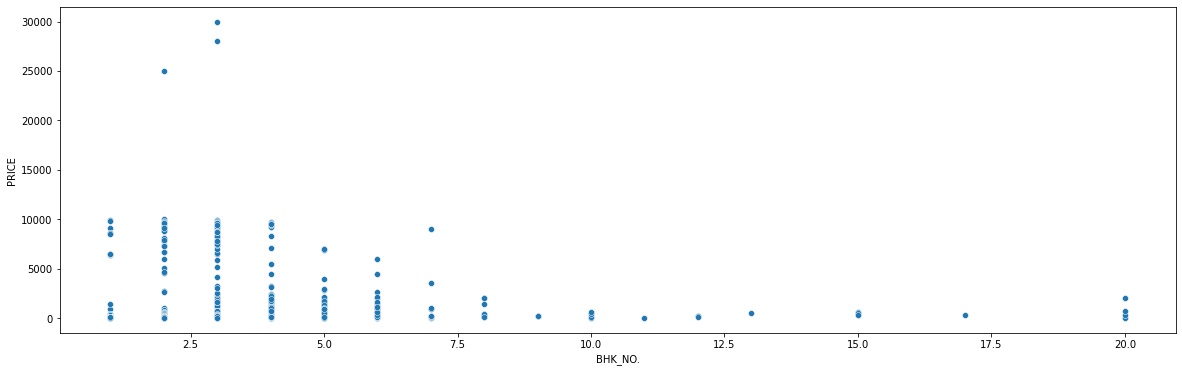

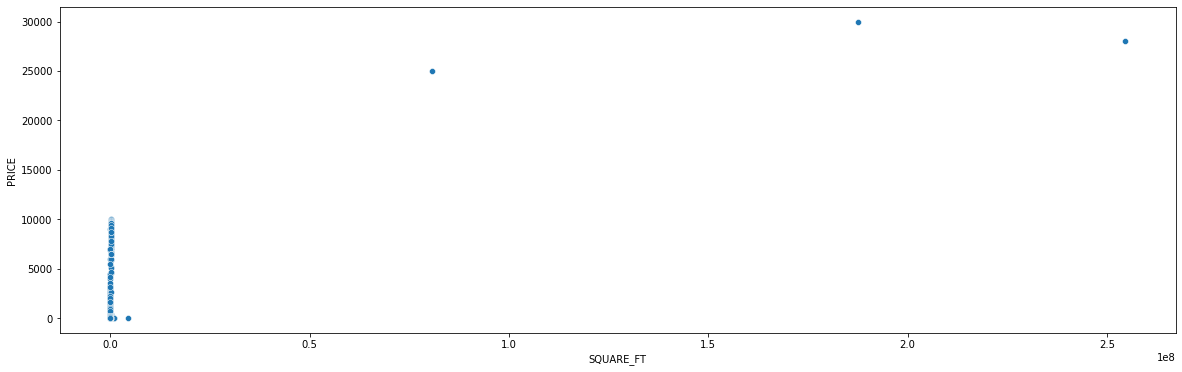

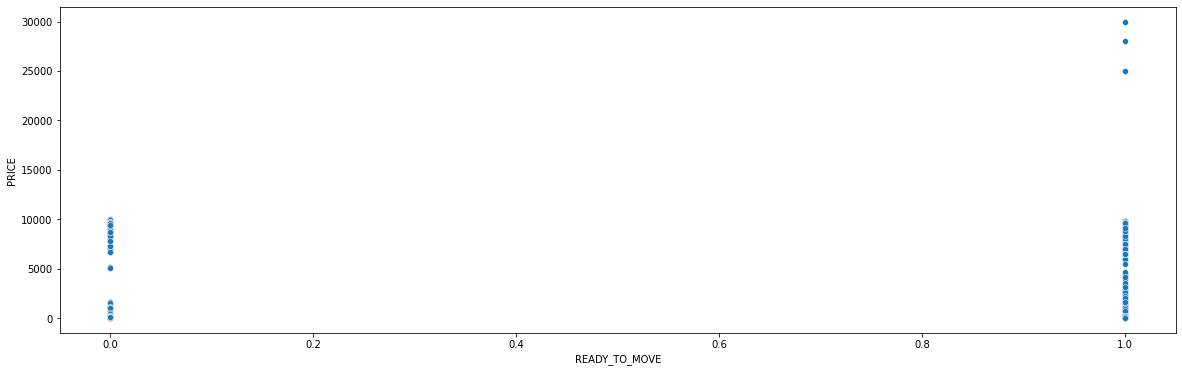

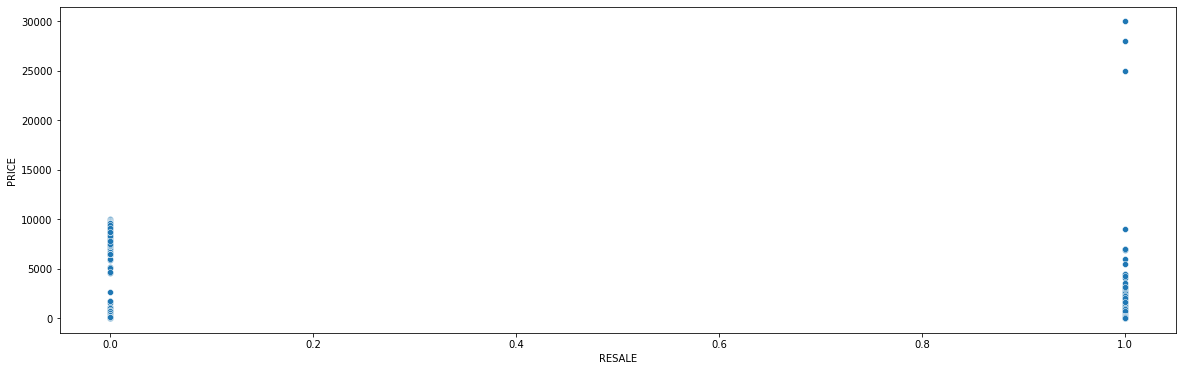

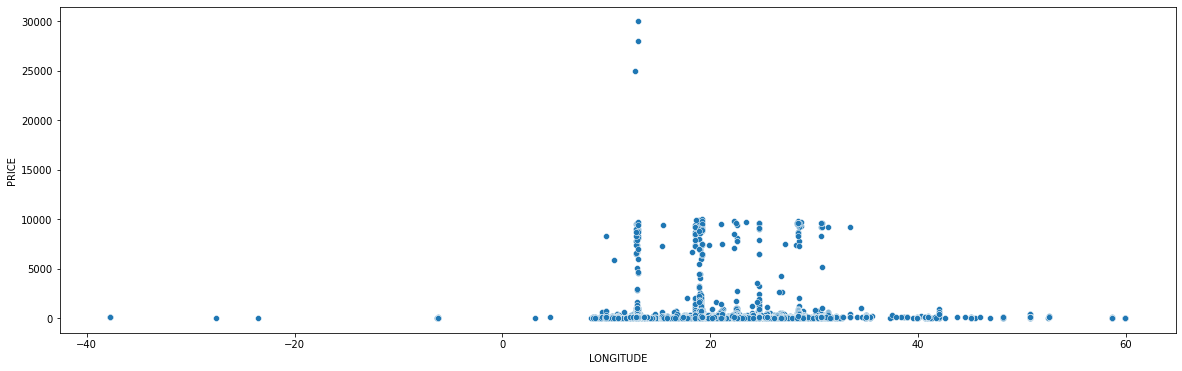

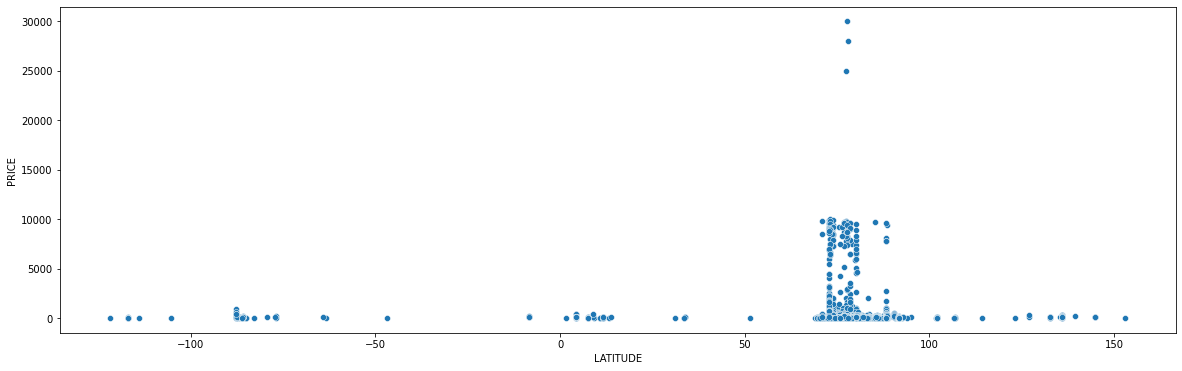

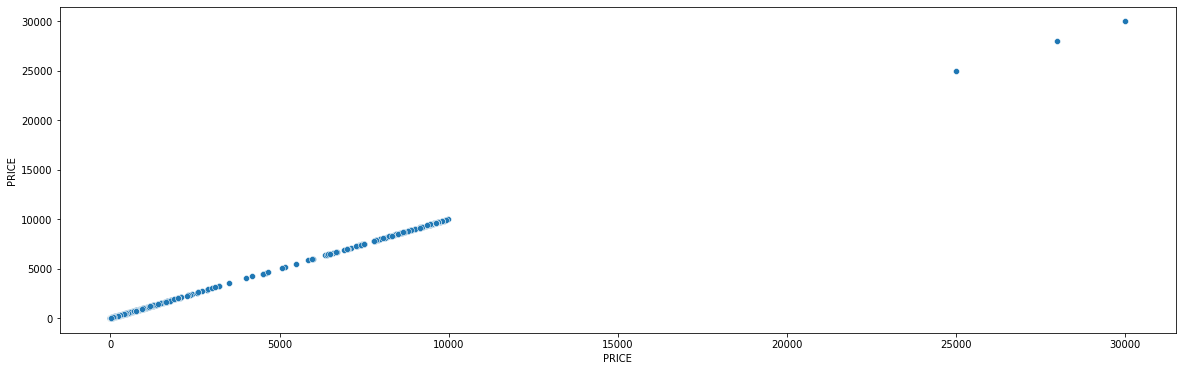

In [6]:
for col in n_col:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=train[col], y=train['PRICE'])

#### Корреляции

In [7]:
train.corr(numeric_only=float)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
PRICE,0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


В основном зависимость между признаками слабая.
### Тестовая выборка

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


Цена в таблице отсутствует. Нет пропущенных значений.

In [9]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TARGET(PRICE_IN_LACS)  68720 non-null  float64
dtypes: float64(1)
memory usage: 537.0 KB


Проверим для численных значений.

In [10]:
X_test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


Исходя из этой таблицы, аномальные значения присутствуют.

In [11]:
y_test.describe()

,TARGET(PRICE_IN_LACS)
count,68720.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Выходных значений для тестовых данных нет.

In [12]:
columns = X_test.columns
for col in columns:
    print(X_test[col].value_counts())
    print("the total values is :", X_test[col].value_counts().sum())
    print('*' * 50)

Dealer     42437
Owner      24920
Builder     1363
Name: POSTED_BY, dtype: int64
the total values is : 68720
**************************************************
0    56587
1    12133
Name: UNDER_CONSTRUCTION, dtype: int64
the total values is : 68720
**************************************************
0    46968
1    21752
Name: RERA, dtype: int64
the total values is : 68720
**************************************************
2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
18        1
16        1
31        1
Name: BHK_NO., dtype: int64
the total values is : 68720
**************************************************
BHK    68662
RK        58
Name: BHK_OR_RK, dtype: int64
the total values is : 68720
**************************************************
1000.000000    1111
1250.000000     688
800.000000      441
1200.000000     433
1600.000000     282
               ... 
1344.680

#### Удаление аномальных значений по методу z-оценки в тренировочной выборке

In [13]:
import numpy as np
import scipy.stats as stats

print(train.shape)
train.drop_duplicates(inplace=True)
n_col = train.select_dtypes(['int', 'float'])

z = np.abs(stats.zscore(n_col))
train1 = train[(z < 3).all(axis = 1)]

print(train1.shape)

(29451, 12)
(26681, 12)


#### Удаление аномальных значений по методу z-оценки в тестовой выборке

In [14]:
print(X_test.shape)
X_test.drop_duplicates(inplace=True)
n_col = X_test.select_dtypes(['int', 'float'])

z = np.abs(stats.zscore(n_col))
X_test1 = X_test[(z < 3).all(axis = 1)]

print(X_test1.shape)

(68720, 11)
(60854, 11)


Количество значений в обеих выборках уменьшилось.
# Пункт 2
## Линейная регрессия
Так как ADDRESS - качественный признак с очень большим количеством уникальных значений, то мы не будем использовать этот признак при создании модели. При его использовании модель будет переобучена под тренировочные данные.

In [15]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

y_train = train1.PRICE
X_train = train1.drop(['PRICE', 'ADDRESS'], axis = 1)
X_hot_train = pd.get_dummies(X_train)
X_hot_test = pd.get_dummies(X_test1)

hot_train = pd.concat((X_hot_train, y_train), axis = 1)

regr = smf.ols(formula='y_train ~ X_hot_train', data=hot_train)
est2 = regr.fit()
print(est2.summary())
print('*' * 50)
print(X_hot_train.columns)

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1050.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:49:32   Log-Likelihood:            -1.6437e+05
No. Observations:               26681   AIC:                         3.288e+05
Df Residuals:                   26671   BIC:                         3.288e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         130.0288      7.792     

Расчетное значение статистики критерия Фишера: F-statistic = 1050.
Расчетный уровень значимости Prob (F-statistic) = 0.00.
Так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ.
Тем не менее, R-squared = 0.262, то есть регрессионная модель объясняет лишь 26.2% вариации переменной Y.
Незначимы коэффициенты для RERA, SQUARE_FT, так как расчетный уровень значимости P>|t| превышает 0.05. Также незначим POSTED_BY_Builder, но он - один из изначальных параметров POSTED_BY, где остальные являются значимыми.
Наиболее информативные признаки: UNDER_CONSTRUCTION, BHK_NO., READY_TO_MOVE, RESALE, LONGITUDE, LATITUDE, BHK_OR_RK (и POSTED_BY_Dealer, но он не изначальный признак). Чем меньше расчетный уровень значимости P>|t|, тем более значим признак.
# Пункт 3
## Градиентный бустинг

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_hot_train, y_train, test_size=0.4)
boost = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

boost.fit(X_train1, y_train1)
y_pred = boost.predict(X_test1)
output = pd.DataFrame({'Price': y_pred, 'real_price': y_test1})
output.tail()

,Price,real_price
10971,25.526862,29.9
4739,31.703562,65.0
5300,139.732624,160.0
7747,93.891867,90.0
27814,85.295400,42.0


## Сравнение с линейной регрессией

In [17]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(X_train1, y_train1)
y_reg = reg.predict(X_test1)
scores1 = cross_val_score(reg, X_hot_train, y_train, cv=10, n_jobs = -1)
print('Accuracy of Linear Regression: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))

scores2 = cross_val_score(boost, X_hot_train, y_train, cv=10, n_jobs = -1)
print('Accuracy of Gradient Boosting: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))

Accuracy of Linear Regression: 0.259 +/- 0.014
Accuracy of Gradient Boosting: 0.573 +/- 0.021


Линейная регрессия очень слабо предсказывает результаты, градиентный бустинг справляется лучше. Тем не менее, у обоих методов большая ошибка определения.
# Пункт 4
## Наиболее информативные переменные
Для линейной регрессии наиболее информативные переменные: UNDER_CONSTRUCTION, BHK_NO., READY_TO_MOVE, RESALE, LONGITUDE, LATITUDE, BHK_OR_RK. Из них UNDER_CONSTRUCTION, READY_TO_MOVE, RESALE, BHK_OR_RK - категориальные признаки. Значит, есть смысл строить графики на BHK_NO., LONGITUDE, LATITUDE.
Проверим на градиентном бустинге.

In [18]:
print('Feature importances: ', boost.feature_importances_)
print(X_hot_train.columns)

Feature importances:  [0.         0.         0.02606803 0.52982744 0.         0.
 0.13576562 0.2879715  0.         0.01802888 0.00233853 0.
 0.        ]
Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'BHK_OR_RK_BHK', 'BHK_OR_RK_RK'],
      dtype='object')


Наиболее значимыми признаками для градиентного бустинга являются: SQUARE_FT, LATITUDE, LONGITUDE.
## Функция построения графиков зависимостей

In [19]:
def PlotGraphs(Xy, feature, clf1, clf2, dist = 1):
    plt.figure()
    Xy0 = Xy.sort_values(by=[feature])
    y0 = Xy0.PRICE
    X0 = Xy0.drop(['PRICE'], axis = 1)
    y1 = clf1.predict(X0)
    y2 = clf2.predict(X0)
    X = X0[feature].to_numpy()
    y = y0.to_numpy()
    i = 1
    while i < X.size:
        if X[i] - X[i - 1] < dist:
            X = np.delete(X, i)
            y = np.delete(y, i)
            y1 = np.delete(y1, i)
            y2 = np.delete(y2, i)
        else:
            i += 1
    plt.plot(X, y, alpha=.8, label='Real price')
    plt.plot(X, y1, alpha=.8, label='Linear Regression')
    plt.plot(X, y2, alpha=.8, label='Gradient Boosting')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

## Графики

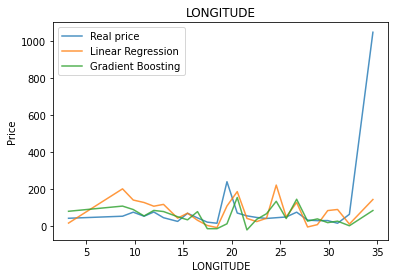

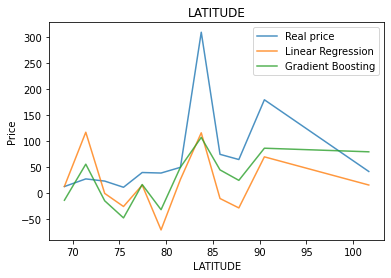

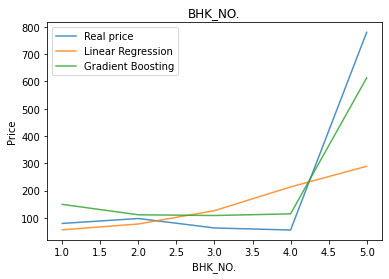

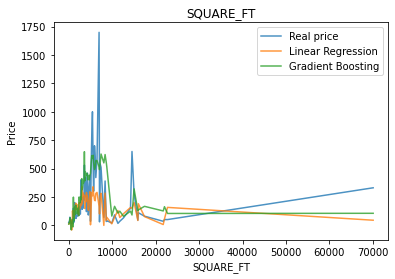

In [20]:
test = pd.concat((X_test1, y_test1), axis = 1)
PlotGraphs(test, 'LONGITUDE', reg, boost, dist = 1)
PlotGraphs(test, 'LATITUDE', reg, boost, dist = 2)
PlotGraphs(test, 'BHK_NO.', reg, boost, dist = 0.1)
PlotGraphs(test, 'SQUARE_FT', reg, boost, dist = 100)

Зависимость прослеживается, но полностью модели не описывают выборку.